***Dataset information***


The International Bank for Reconstruction and Development (IBRD) loans are public and publicly guaranteed debt extended by the World Bank Group. IBRD loans are made to, or guaranteed by, countries that are members of IBRD. IBRD may also make loans to IFC. IBRD lends at market rates.The World Bank complies with all sanctions applicable to World Bank transactions.


1. End of Period - End of Period Date represents the date as of which balances are shown in the report.
2. Loan Number - For IBRD loans and IDA credits or grants a loan number consists of the organization prefix (IBRD/IDA) and a five-character label that uniquely identifies the loan within the organization. In IDA, all grant labels start with the letter ‘H’.
3. Region - Country lending is grouped into regions based on the current World Bank administrative (rather than geographic) region where project implementation takes place. The Other Region is used for loans to the IFC.
4. Country Code - Country Code according to the World Bank country list. Might be different from the ISO country code.
5. Country - Country to which loan has been issued. Loans to the IFC are included under the country “World”.
6. Borrower - The representative of the borrower to which the Bank loan is made.
7. Guarantor Country Code - Country Code of the Guarantor according to the World Bank country list. Might be different from the ISO country code.
8. Guarantor -The Guarantor guarantees repayment to the Bank if the borrower does not repay.
9. Loan Type -A type of loan/loan instrument for which distinctive accounting and/or other actions need to be performed. 
10. Loan Status - Status of the loan. See Data Dictionary attached in the About section or Data Dictionary dataset available from the list of all datasets for status descriptions.
11. Interest Rate - Current Interest rate or service charge applied to loan. For loans that could have more than one interest rate (e.g. FSL or SCL fixed rate loans), the interest rate is shown as “0”.
12. Currency of Commitment - The currency in which a borrower’s loan, credit, grant or trust fund is denominated.
13. Project ID -A Bank project is referenced by a project ID (Pxxxxxxx). More than one loan or credit may be associated with one Project ID.
14. Project Name -Short descriptive project name.
15. Original Principal Amount -The original US dollar amount of the loan that is committed and approved.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 

In [41]:
#Reading the csv file
df = pd.read_csv(r"IBRD_Statement_Of_Loans_-_Historical_Data_20240724.csv",low_memory=False)
df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,05/31/2022 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,...,"249,962,000",0.0,0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,05/31/2022 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,"87,672,000",0.0,0,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN
2,05/31/2022 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,"3,955,788.25",0.0,0,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN
3,05/31/2022 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,...,"22,229,000",0.0,0,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
4,05/31/2022 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,...,"10,142,000",0.0,0,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN


***Data Preprocessing***

In [42]:
#Checking the dtypes to ensure the columns have appropriate data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332985 entries, 0 to 1332984
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   End of Period                 1332985 non-null  object 
 1   Loan Number                   1332985 non-null  object 
 2   Region                        1332985 non-null  object 
 3   Country Code                  1332663 non-null  object 
 4   Country                       1332985 non-null  object 
 5   Borrower                      1323806 non-null  object 
 6   Guarantor Country Code        1283652 non-null  object 
 7   Guarantor                     1257306 non-null  object 
 8   Loan Type                     1332985 non-null  object 
 9   Loan Status                   1332985 non-null  object 
 10  Interest Rate                 1302149 non-null  float64
 11  Currency of Commitment        0 non-null        float64
 12  Project ID                  

In [43]:
#Converting date and numerical columns to appropriate dtypes.
date_columns = ['First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date', 'Board Approval Date','Effective Date (Most Recent)', 'Closed Date (Most Recent)', 'Last Disbursement Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

num_columns = ['Interest Rate', 'Original Principal Amount', 'Cancelled Amount', 'Undisbursed Amount', 'Disbursed Amount', 'Repaid to IBRD', 'Due to IBRD', 'Exchange Adjustment', "Borrower's Obligation", 'Sold 3rd Party', 'Repaid 3rd Party', 'Due 3rd Party', 'Loans Held']
for col1 in num_columns:
    df[col1] = pd.to_numeric(df[col1], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332985 entries, 0 to 1332984
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   End of Period                 1332985 non-null  object        
 1   Loan Number                   1332985 non-null  object        
 2   Region                        1332985 non-null  object        
 3   Country Code                  1332663 non-null  object        
 4   Country                       1332985 non-null  object        
 5   Borrower                      1323806 non-null  object        
 6   Guarantor Country Code        1283652 non-null  object        
 7   Guarantor                     1257306 non-null  object        
 8   Loan Type                     1332985 non-null  object        
 9   Loan Status                   1332985 non-null  object        
 10  Interest Rate                 1302149 non-null  float64       
 11

In [44]:
# Adding new columns pertaining to the duration of loan and remaining principal amount.
df['Loan Duration'] = (df['Last Repayment Date'] - df['First Repayment Date']).dt.days
df['Remaining Principal'] = df['Original Principal Amount'] - df['Repaid to IBRD']

In [45]:
#checking missing values

df.isnull().sum()

End of Period                         0
Loan Number                           0
Region                                0
Country Code                        322
Country                               0
Borrower                           9179
Guarantor Country Code            49333
Guarantor                         75679
Loan Type                             0
Loan Status                           0
Interest Rate                     30836
Currency of Commitment          1332985
Project ID                           42
Project Name                     159114
Original Principal Amount       1290935
Cancelled Amount                 660890
Undisbursed Amount               103691
Disbursed Amount                1231187
Repaid to IBRD                  1117042
Due to IBRD                      302449
Exchange Adjustment               69205
Borrower's Obligation            292456
Sold 3rd Party                   140231
Repaid 3rd Party                 140231
Due 3rd Party                         0


In [46]:
# Dropping columns with excessive missing values
columns_to_drop = ['Currency of Commitment','Guarantor Country Code','Guarantor','Project Name ','Remaining Principal']
df = df.drop(columns=columns_to_drop)


In [47]:
#Reducing the memory usage of the dataframe by downcasting data types from "float64" -> "float32" & "int64" -> "int32".
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype == "int64"]

    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int32)
    return df

df = downcast_dtypes(df)

In [48]:
#Repairing missing values by using imputation and using a mean value.
num_cols = df.select_dtypes(include=['float32', 'int32']).columns
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [49]:
df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Loan Type,Loan Status,Interest Rate,Project ID,...,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date,Loan Duration
0,05/31/2022 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,NPL,Fully Repaid,4.25,P037383,...,0.0,0.0,1952-11-01,1977-05-01,1947-05-09,1947-05-09,1947-06-09,1947-12-31,NaT,8947.0
1,05/31/2022 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NPL,Fully Repaid,4.25,P037452,...,0.0,0.0,1952-04-01,1972-10-01,1947-08-07,1947-08-07,1947-09-11,1948-03-31,NaT,7488.0
2,05/31/2022 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NPL,Fully Repaid,4.25,P037452,...,0.0,0.0,1953-04-01,1954-04-01,1948-05-25,1947-08-07,1948-06-01,1948-06-30,NaT,365.0
3,05/31/2022 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NPL,Fully Repaid,4.25,P037362,...,0.0,0.0,1953-02-01,1972-08-01,1947-08-22,1947-08-22,1947-10-17,1949-03-31,NaT,7121.0
4,05/31/2022 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NPL,Fully Repaid,4.25,P037451,...,0.0,0.0,1949-07-15,1972-07-15,1947-08-28,1947-08-28,1947-10-24,1949-03-31,NaT,8401.0


In [50]:
# Rechecking to see if there are any missing values left
df.isnull().sum()

End of Period                        0
Loan Number                          0
Region                               0
Country Code                       322
Country                              0
Borrower                          9179
Loan Type                            0
Loan Status                          0
Interest Rate                        0
Project ID                          42
Original Principal Amount            0
Cancelled Amount                     0
Undisbursed Amount                   0
Disbursed Amount                     0
Repaid to IBRD                       0
Due to IBRD                          0
Exchange Adjustment                  0
Borrower's Obligation                0
Sold 3rd Party                       0
Repaid 3rd Party                     0
Due 3rd Party                        0
Loans Held                           0
First Repayment Date              4125
Last Repayment Date               3965
Agreement Signing Date           19418
Board Approval Date      

In [51]:
#The remaining missing values are from the various date columns, dropping the null values and retaining only the loans that have accuracte data values.
df= df.dropna()
df= pd.DataFrame(df)
df.to_csv('cleaned_loan_data.csv', index=False)

In [52]:
df.shape

(788688, 30)

In [53]:
#One-hot encoding for categorical column
encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
cat_cols = ["Loan Status"]
encoded_cats = encoder.fit_transform(df[cat_cols])
X = hstack([df[num_cols], encoded_cats], format='csr')
print(X.shape)


(788688, 26)


***Exploratory ata Analysis***

In [81]:
#Visualizations
def set_custom_style():
    sns.set_theme(style="whitegrid")
    sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
    plt.rcParams.update({'axes.titlesize': 18,'axes.labelsize': 14,'xtick.labelsize': 12,'ytick.labelsize': 12,
                         'legend.fontsize': 12,'axes.facecolor': 'white','axes.edgecolor': 'black','axes.grid': True,
                         'grid.alpha': 0.5,'grid.color': 'gray'})


set_custom_style()

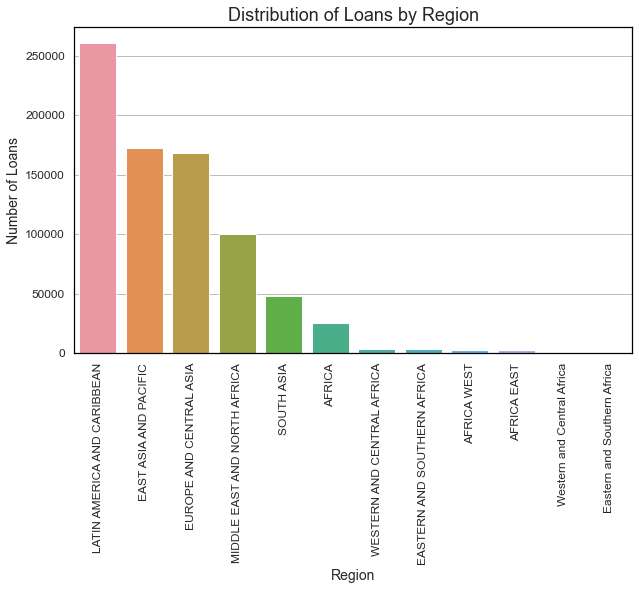

In [82]:
#Analysis how a Loan is Distributed by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Distribution of Loans by Region')
plt.xlabel('Region')
plt.ylabel('Number of Loans')
plt.tick_params(axis='x', rotation=90)
plt.show()

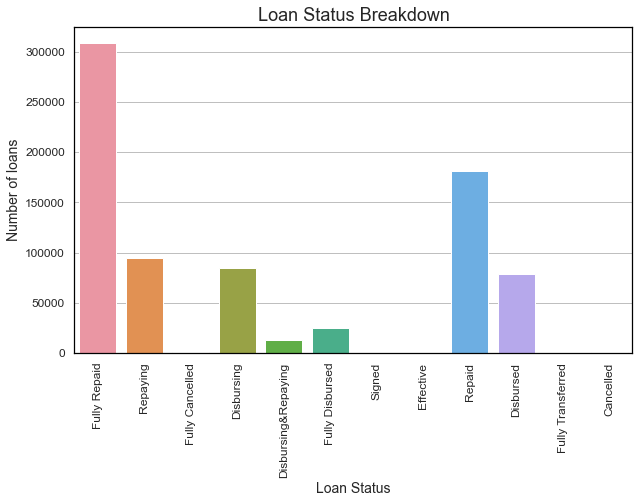

In [83]:
#Different categories Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Loan Status')
plt.title('Loan Status Breakdown')
plt.xlabel('Loan Status')
plt.ylabel('Number of loans')
plt.tick_params(axis='x', rotation=90)
plt.show()

Text(0, 0.5, 'Numbers of loans')

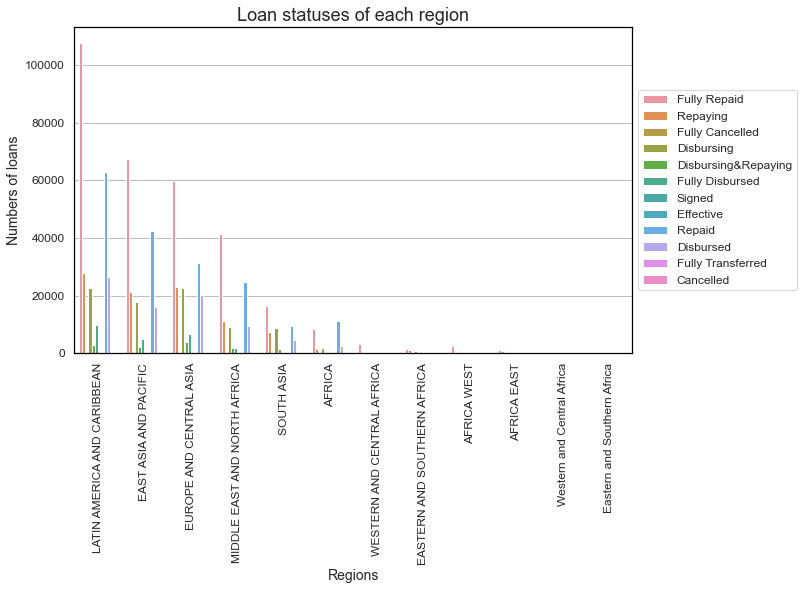

In [84]:
#Analysisng the loan statuses of each region
region_order = df['Region'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Region", hue="Loan Status", order=region_order)
plt.tick_params(axis='x', rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Loan statuses of each region")
plt.xlabel("Regions")
plt.ylabel("Numbers of loans")

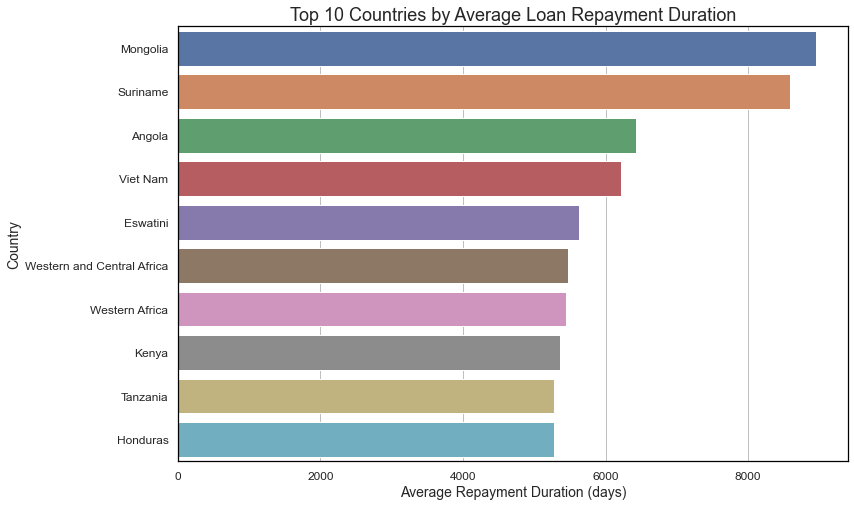

In [85]:
#Analysing the top 10 countries with the longest average repayment duration
df['Repayment Duration'] = (df['Last Repayment Date'] - df['First Repayment Date']).dt.days 
country_repayment_duration = df.groupby('Country')['Repayment Duration'].mean().reset_index()
top_10_countries = country_repayment_duration.nlargest(10, 'Repayment Duration')
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_countries, x='Repayment Duration', y='Country')
plt.title('Top 10 Countries by Average Loan Repayment Duration')
plt.xlabel('Average Repayment Duration (days)')
plt.ylabel('Country')
plt.show()

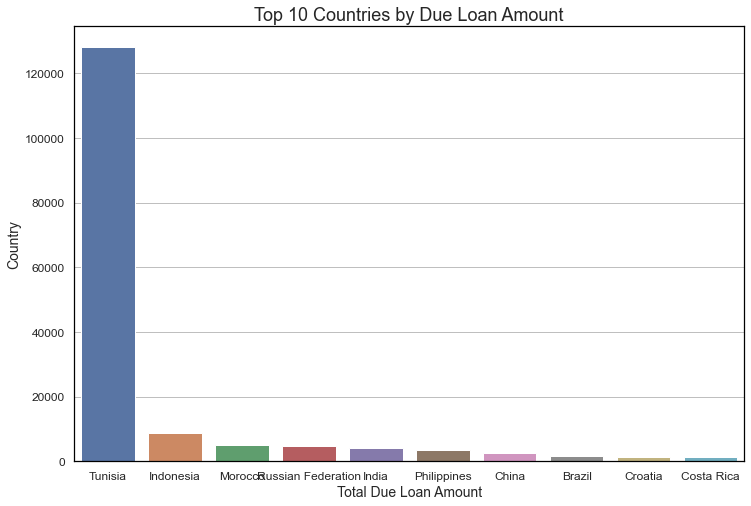

In [86]:
# Select the top 10 countries with the highest due loan amounts
country_due_loans = df.groupby('Country')['Due to IBRD'].sum().reset_index()
top_10_due_countries = country_due_loans.nlargest(10, 'Due to IBRD')
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_due_countries, y='Due to IBRD', x='Country', orient="v")
plt.title('Top 10 Countries by Due Loan Amount')
plt.xlabel('Total Due Loan Amount')
plt.ylabel('Country')
plt.show()

***Model Selection***

In [59]:
df["Loan Status"].value_counts()

Fully Repaid           308991
Repaid                 181531
Repaying                94476
Disbursing              84473
Disbursed               79186
Fully Disbursed         25088
Disbursing&Repaying     12763
Fully Cancelled          1140
Cancelled                 788
Fully Transferred         191
Effective                  41
Signed                     20
Name: Loan Status, dtype: int64

In [60]:
# Define high-risk loan statuses
#Loan performance risk model
high_risk_statuses = ['Repaying', 'Disbursing', 'Disbursed', 'Fully Disbursed', 'Disbursing&Repaying', 'Effective', 'Signed']
df['Loan Risk'] = df['Loan Status'].apply(lambda x: 1 if x in high_risk_statuses else 0)

In [61]:
#Splitting the dataset into training and testing set. The ratio of train to test data is set at 30%
X_train, X_test, y_train, y_test = train_test_split(X, df['Loan Risk'], test_size=0.3, random_state=42)

#Training a random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147885
           1       1.00      1.00      1.00     88722

    accuracy                           1.00    236607
   macro avg       1.00      1.00      1.00    236607
weighted avg       1.00      1.00      1.00    236607

Accuracy: 1.0


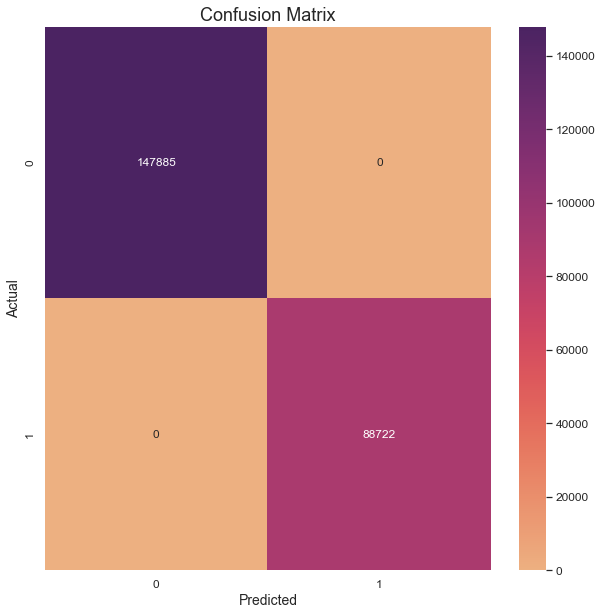

In [87]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap="flare",fmt="g",linecolor="black")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()